## 4.1 探索数据

### 4.1.1 导库/获取数据

In [2]:
%matplotlib inline 
import numpy as np 
import pandas as pd 

In [4]:
data = pd.read_csv(r"Acard.csv",index_col=0)
#观察数据类型 
data.head() 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
#观察数据结构 
data.shape

(150000, 11)

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


### 4.1.2 去重复值

In [8]:
data.drop_duplicates(inplace=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [9]:
data.index = range(data.shape[0]) 
  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


### 4.1.3 填补缺失值

In [11]:
data.isnull().sum()/data.shape[0]  # data.isnull().mean() 

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [12]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True) 
  
data.isnull().sum()/data.shape[0] 

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [13]:
def fill_missing_rf(X, y, to_fill):
    """
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称/MonthlyIncome
    """
    # 构建新特征矩阵和新标签
    df = X.copy() 
    fill = df.loc[:, to_fill]
    df = pd.concat([df.loc[:, df.columns != to_fill], pd.DataFrame(y)], axis=1)

    #找出训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index, :]
    Xtest = df.iloc[Ytest.index, :]

    from sklearn.ensemble import RandomForestRegressor as rfr
    #用随机森林回归来填补缺失值
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [14]:
X = data.iloc[:,1:] 
y = data["SeriousDlqin2yrs"] 

y_pred = fill_missing_rf(X,y,"MonthlyIncome") 
  
#确认我们的结果合理之后，我们就可以将数据覆盖了 
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [15]:
y_pred.shape

(29221,)

## 4.2 描述性统计

### 4.2.1 处理异常值

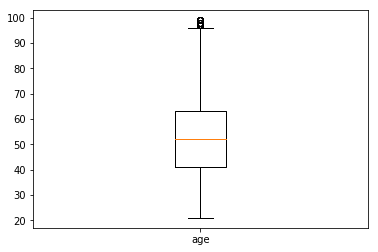

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

x1=data['age']
fig,axes = plt.subplots()
axes.boxplot(x1)
axes.set_xticklabels(['age'])

data = data[data['age']>0]
data = data[data['age']<100]

In [23]:
data = data[data["age"] != 0] 
data.shape

(149377, 11)

In [28]:
data.describe([0.01,0.1,0.25,.5,.75,.9,.99])
(data["age"] == 0).sum() 

data = data[data["age"] != 0] 

data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count() 
  
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90] 

data.index = range(data.shape[0]) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149152 entries, 0 to 149151
Data columns (total 11 columns):
SeriousDlqin2yrs                        149152 non-null int64
RevolvingUtilizationOfUnsecuredLines    149152 non-null float64
age                                     149152 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149152 non-null int64
DebtRatio                               149152 non-null float64
MonthlyIncome                           149152 non-null float64
NumberOfOpenCreditLinesAndLoans         149152 non-null int64
NumberOfTimes90DaysLate                 149152 non-null int64
NumberRealEstateLoansOrLines            149152 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149152 non-null int64
NumberOfDependents                      149152 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


### 4.2.2 处理样本不均衡问题

样本个数：149152; 1占6.62%; 0占 93.38%


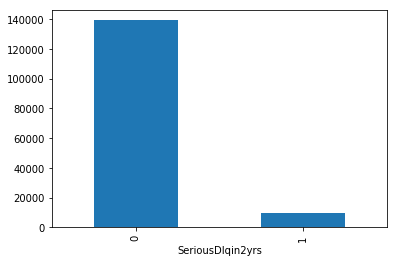

In [29]:
#探索标签的分布 
X = data.iloc[:,1:] 
y = data.iloc[:,0] 
  
y.value_counts() 
  
n_sample = X.shape[0] 
  
n_1_sample = y.value_counts()[1] 
n_0_sample = y.value_counts()[0] 

grouped = data['SeriousDlqin2yrs'].groupby(data['SeriousDlqin2yrs']).count()
grouped.plot(kind='bar')


print('样本个数：{}; 1占{:.2%}; 0占 {:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample)) 




In [30]:
from imblearn.over_sampling import SMOTE  #conda install -c glemaitre imbalanced-learn
import imblearn 
  
from imblearn.over_sampling import SMOTE 
  
sm = SMOTE(random_state=42) #实例化 
X,y = sm.fit_sample(X,y) 
  

In [31]:
n_sample_ = X.shape[0] 
  
pd.Series(y).value_counts() 
  
n_1_sample = pd.Series(y).value_counts()[1] 
n_0_sample = pd.Series(y).value_counts()[0] 
  
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：278560; 1占50.00%; 0占50.00%


### 4.2.3 训练集和测试集

In [32]:
from sklearn.model_selection import train_test_split 
X = pd.DataFrame(X) 
y = pd.DataFrame(y) 
  
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1) 
model_data.index = range(model_data.shape[0]) 
model_data.columns = data.columns 
  
vali_data = pd.concat([Y_vali, X_vali], axis=1) 
vali_data.index = range(vali_data.shape[0]) 
vali_data.columns = data.columns 
  
model_data.to_csv(r"model_data.csv") 
  
vali_data.to_csv(r"C:vali_data.csv") 

## 4.3 分箱处理

### 4.3.1 等频分箱

In [35]:
#retbins 默认为False，为True是返回值是元组
#q：分组个数
  
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20) 

coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count() ["SeriousDlqin2yrs"] 
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count() ["SeriousDlqin2yrs"] 
  
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数 
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)] 
  
#注意zip会按照最短列来进行结合 
num_bins

[(21.0, 28.0, 4232, 7592),
 (28.0, 31.0, 3534, 5838),
 (31.0, 34.0, 4045, 6813),
 (34.0, 36.0, 2925, 4710),
 (36.0, 39.0, 5269, 7570),
 (39.0, 41.0, 3977, 5667),
 (41.0, 43.0, 4044, 5644),
 (43.0, 45.0, 4404, 6003),
 (45.0, 46.0, 2345, 3258),
 (46.0, 48.0, 4851, 6366),
 (48.0, 50.0, 4882, 6164),
 (50.0, 52.0, 4658, 5796),
 (52.0, 54.0, 4661, 4885),
 (54.0, 56.0, 4507, 4071),
 (56.0, 58.0, 4525, 3475),
 (58.0, 61.0, 6662, 4841),
 (61.0, 64.0, 6959, 3132),
 (64.0, 68.0, 6608, 2309),
 (68.0, 74.0, 6776, 1939),
 (74.0, 99.0, 7703, 1352)]

In [36]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.048270,42,0,0.706470,3600.00,15,0,2,0,1.000000,"(41.0, 43.0]"
1,0,0.224926,54,0,0.121769,7078.00,14,0,0,0,0.000000,"(52.0, 54.0]"
2,0,0.015893,61,0,21.000000,109.21,15,0,0,0,1.000000,"(58.0, 61.0]"
3,1,0.892122,41,1,1.088529,4333.00,4,0,1,1,0.309038,"(39.0, 41.0]"
4,1,0.664118,29,0,0.337627,2500.00,8,0,0,0,0.264330,"(28.0, 31.0]"


### 4.3.2 封装WOE和IV函数

In [37]:
def get_woe(num_bins):
    columns = ["min","max","count_0","count_1"] 
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1 
    df["percentage"] = df.total / df.total.sum() 
    df["bad_rate"] = df.count_1 / df.total 
    df["good%"] = df.count_0/df.count_0.sum() 
    df["bad%"] = df.count_1/df.count_1.sum() 
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df


# 计算IV值 
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv 

### 4.3.3 用卡方检验来合并箱体画出IV曲线

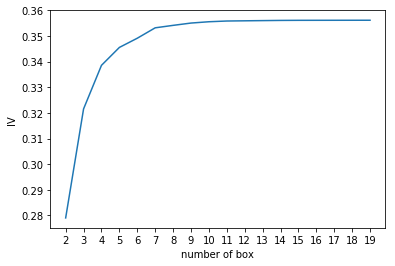

In [39]:
num_bins_ = num_bins.copy()

import matplotlib.pyplot as plt
import scipy

IV = []
axisx = []

while len(num_bins_) > 2:
    pvs = []
    
    for i in range(len(num_bins_) - 1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i + 1][2:]
        
        pv = scipy.stats.chi2_contingency([x1, x2])[1]
        pvs.append(pv)

    
    i = pvs.index(max(pvs))
    num_bins_[i:i + 2] = [(num_bins_[i][0],num_bins_[i+1][1],num_bins_[i][2]+num_bins_[i+1][2],num_bins_[i][3]+num_bins_[i+1][3])]

    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))

plt.figure()
plt.plot(axisx, IV)
plt.xticks(axisx)
plt.xlabel("number of box") 
plt.ylabel("IV") 
plt.show() 


### 4.3.4 用最佳分箱个数分箱，并验证分箱结果

In [40]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    DF = DF[[X,Y]].copy()
    DF["qcut"],bins = pd.qcut(DF[X],retbins=True,q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    # 确保每个箱中都有0和1
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0],num_bins[1][1],num_bins[0][2]+num_bins[1][2],num_bins[0][3]+num_bins[1][3])]
            continue
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0],num_bins[i][1],num_bins[i-1][2]+num_bins[i][2],num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
    #计算WOE
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    #计算IV值
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    # 卡方检验，合并分箱
    IV = []
    axisx = []
    while len(num_bins) > n:
        global bins_df
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(num_bins[i][0],num_bins[i+1][1],num_bins[i][2]+num_bins[i+1][2],num_bins[i][3]+num_bins[i+1][3])]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
        
    return bins_df



In [41]:
model_data.columns 

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


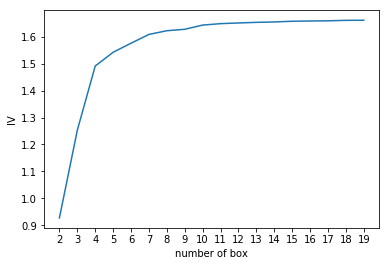

age


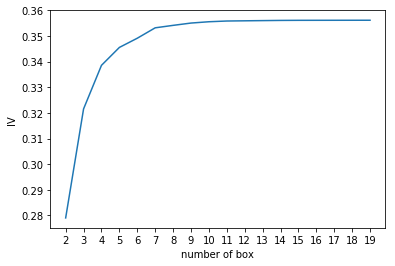

NumberOfTime30-59DaysPastDueNotWorse


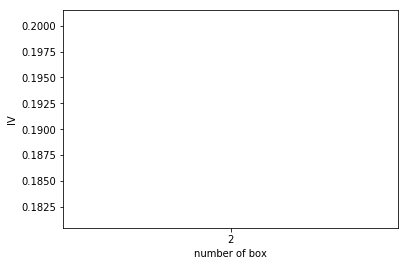

DebtRatio


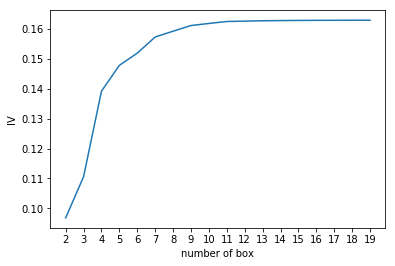

MonthlyIncome


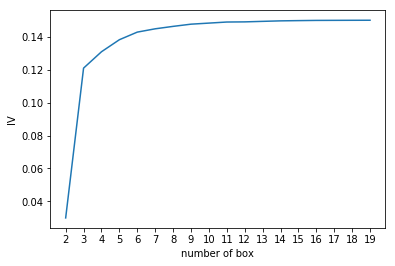

NumberOfOpenCreditLinesAndLoans


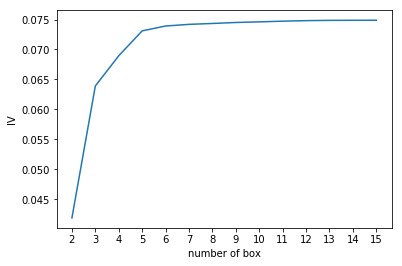

NumberOfTimes90DaysLate


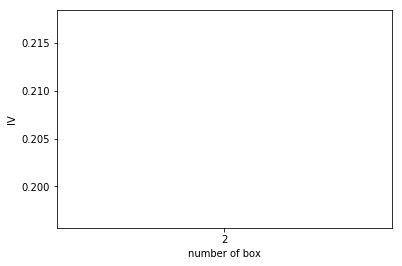

NumberRealEstateLoansOrLines


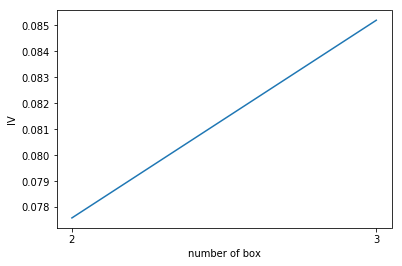

NumberOfTime60-89DaysPastDueNotWorse


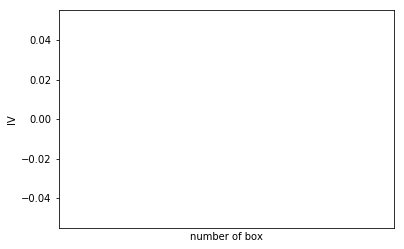

NumberOfDependents


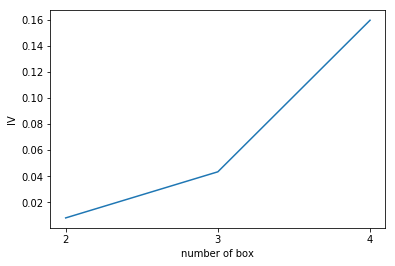

In [42]:
for i in model_data.columns[1:-1]:
    print(i)

    graphforbestbin(model_data,i ,"SeriousDlqin2yrs",n=2,q = 20)



In [43]:
auto_bins = {'RevolvingUtilizationOfUnsecuredLines':5
            ,'age':6
            ,'DebtRatio':4
            ,'MonthlyIncome':3
            ,'NumberOfOpenCreditLinesAndLoans':7
            }



In [44]:
hand_bins = {'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13]
            ,'NumberOfTimes90DaysLate':[0,1,2,17]
            ,'NumberRealEstateLoansOrLines':[0,1,2,4,54]
            ,'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8]
            ,'NumberOfDependents':[0,1,2,3]
            }

hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

bins_of_col = {}
for col in auto_bins:
    bins_df = graphforbestbin(model_data,col,'SeriousDlqin2yrs',n = auto_bins[col],q=20,graph=False)
    bins_list = sorted(set(bins_df['min']).union(bins_df['max']))
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

bins_of_col.update(hand_bins)
bins_of_col 




{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0601572472,
  0.2967246438,
  0.5513223325011126,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 52.0, 56.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.01746415575,
  0.3199668078059851,
  1.5117839943256448,
  inf],
 'MonthlyIncome': [-inf, 0.09903188507757776, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 2.0, 3.0, 5.0, 6.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

## 4.4 计算各箱的WOE并映射到数据

In [47]:
data = model_data.copy() 
data = data[["age","SeriousDlqin2yrs"]].copy() 
  
data["cut"] = pd.cut(data["age"],[-np.inf, 36.0, 52.0, 56.0, 61.0, 74.0, np.inf]) 
  
data 
  

,age,SeriousDlqin2yrs,cut
0,42,0,"(36.0, 52.0]"
1,54,0,"(52.0, 56.0]"
2,61,0,"(56.0, 61.0]"
3,41,1,"(36.0, 52.0]"
4,29,1,"(-inf, 36.0]"
...,...,...,...
194987,26,1,"(-inf, 36.0]"
194988,36,0,"(-inf, 36.0]"
194989,48,1,"(36.0, 52.0]"
194990,89,0,"(74.0, inf]"


In [48]:
#将数据按分箱结果聚合，并取出其中的标签值 
data.groupby("cut")["SeriousDlqin2yrs"].value_counts() 
  
#使用unstack()来将分支状结构变成表状结构 
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack() 
  
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack() 
  
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum())) 

In [49]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14736,24953,-0.528157
"(36.0, 52.0]",34430,46468,-0.301292
"(52.0, 56.0]",9168,8956,0.021939
"(56.0, 61.0]",11187,8316,0.295115
"(61.0, 74.0]",20343,7380,1.012507
"(74.0, inf]",7703,1352,1.738568


In [50]:
# df:数据表
# col：列
# bins：箱子的个数
def get_woe(df,col,y,bins):
    
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins) 
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    iv = np.sum((bins_df[0]/bins_df[0].sum()-bins_df[1]/bins_df[1].sum())*bins_df['woe'])
    return woe

In [51]:
# 所有的WOE
woeall = {}

for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
woeall   

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0602]     2.454528
 (0.0602, 0.297]    0.854575
 (0.297, 0.551]    -0.255194
 (0.551, 1.0]      -1.009565
 (1.0, inf]        -2.043275
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.528157
 (36.0, 52.0]   -0.301292
 (52.0, 56.0]    0.021939
 (56.0, 61.0]    0.295115
 (61.0, 74.0]    1.012507
 (74.0, inf]     1.738568
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0175]    1.476452
 (0.0175, 0.32]    0.079382
 (0.32, 1.512]    -0.312205
 (1.512, inf]      0.167100
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.099]      1.255267
 (0.099, 5600.0]   -0.229847
 (5600.0, inf]      0.237632
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.857776
 (1.0, 2.0]    -0.418703
 (2.0, 3.0]    -0.255258
 (3.0, 5.0]    -0.060634
 (5.0, 6.0]     0.077346
 (6.0, 17.0]    0.137661
 (17.0, inf]    0.443648
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.353740
 (0.0, 1.0]    -0.870009
 (1.0, 2.0]  

In [52]:
model_woe = pd.DataFrame(index=model_data.index)

for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])

model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

model_woe  #这就是建模数据



,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.454528,-0.301292,-0.312205,-0.229847,0.137661,0.353740,0.236664,0.636290,0.124823,-0.588620,0
1,0.854575,0.021939,0.079382,0.237632,0.137661,0.353740,0.236664,-0.399029,0.124823,0.625336,0
2,2.454528,0.295115,0.167100,-0.229847,0.137661,0.353740,0.236664,-0.399029,0.124823,-0.588620,0
3,-1.009565,-0.301292,-0.312205,-0.229847,-0.060634,-0.870009,0.236664,0.198435,-1.411050,-0.588620,1
4,-1.009565,-0.528157,-0.312205,-0.229847,0.137661,0.353740,0.236664,-0.399029,0.124823,-0.588620,1
...,...,...,...,...,...,...,...,...,...,...,...
194987,-1.009565,-0.528157,0.079382,-0.229847,0.137661,0.353740,0.236664,-0.399029,0.124823,-0.588620,1
194988,-1.009565,-0.528157,-0.312205,-0.229847,0.137661,0.353740,0.236664,0.198435,0.124823,-0.588620,0
194989,-0.255194,-0.301292,-0.312205,0.237632,0.137661,0.353740,0.236664,-0.317472,0.124823,-0.588620,1
194990,2.454528,1.738568,1.476452,-0.229847,-0.857776,0.353740,0.236664,-0.399029,0.124823,0.625336,0


## 4.5 建模与模型验证

In [54]:
woeall_vali = {}
for col in bins_of_col:
    woeall_vali[col] = get_woe(vali_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
# 测试数据    
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall_vali[col])

vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]


vali_x = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [55]:
from sklearn.linear_model import LogisticRegression as LR
# 训练集
x = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
lr = LR().fit(x,y)
lr.score(vali_x,vali_y)



0.7838407045759143

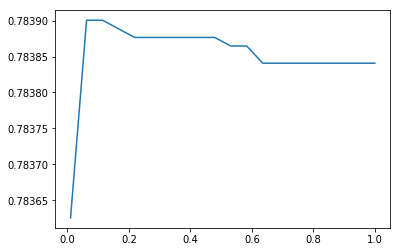

In [56]:
c_1 = np.linspace(0.01,1,20) 
c_2 = np.linspace(0.01,0.2,20)

score = []
for i in  c_1:
    lr = LR(solver="liblinear",C = i).fit(x,y)
    score.append(lr.score(vali_x,vali_y))


plt.figure()
plt.plot(c_1,score)
plt.show()

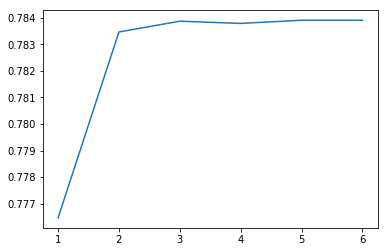

In [57]:
import warnings
warnings.filterwarnings('ignore')
score = []
for i in [1,2,3,4,5,6]:
    lr = LR(solver="liblinear" ,C = 0.025 , max_iter=i).fit(x,y)
    score.append(lr.score(vali_x , vali_y))
    
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()



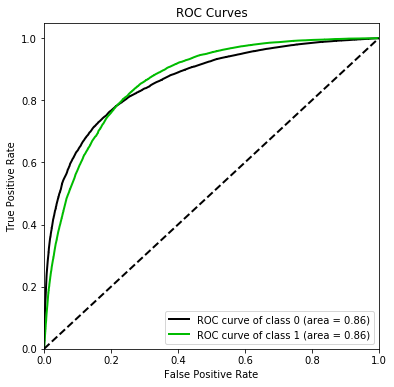

In [58]:
import scikitplot as skplt  #pip install scikit-plot 
  
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_x))

skplt.metrics.plot_roc(vali_y, vali_proba_df, plot_micro=False,figsize=(6,6),plot_macro=False) 

## 4.6 制作评分卡

In [60]:
B = 20/np.log(2) 
A = 600 + B*np.log(1/60)

In [61]:
B ,A

(28.85390081777927, 481.8621880878296)

In [62]:
base_score = A - B*lr.intercept_ 
base_score 

array([481.84554281])

In [63]:
score_age = woeall["age"] * (-B*lr.coef_[0][0]) 
score_age 

cut
(-inf, 36.0]   -11.413547
(36.0, 52.0]    -6.510964
(52.0, 56.0]     0.474105
(56.0, 61.0]     6.377466
(61.0, 74.0]    21.880412
(74.0, inf]     37.570705
dtype: float64

In [64]:
file = "ScoreData.csv" 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(x.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")

